In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans


PROBLEMA 1

Modelo a implementar: Kmeans

Archivo fuente: usuarios_twitter.csv

Objetivo: agrupar usuarios por sus rasgos de personalidad

Variable de entrada: crea tu modelo seleccionando solo 3 características

usuario: nombre en Twitter

“op”: Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte

“co”: Conscientiousness – grado de orden, prolijidad, organización

“ex”: Extraversion – grado de timidez, solitario o participación ante el grupo social

“ag”: Agreeableness – grado de empatía con los demás, temperamento

“ne”: Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
Wordcoun: Cantidad promedio de palabras usadas en sus tweets

Variable de salida: Categoría – Actividad laboral del usuario (1. Actor/actriz, 2. Cantante, 3. Modelo, 4. Tv, series, 5. Radio, 6. Tecnología, 7. Deportes, 8. Politica y 9. Escritor)

In [2]:
df = pd.read_csv("usuarios_twitter.csv", sep = ",", header=0)
df.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [10]:
y = df["categoria"]
y[:5]

0    7
1    7
2    4
3    2
4    4
Name: categoria, dtype: int64

In [3]:
columns = df.columns
# Seleccionamos 3 características porque sí

sel_col = ["op", "co", "ag"]
sel_col


Index(['usuario', 'op', 'co', 'ex', 'ag', 'ne', 'wordcount', 'categoria'], dtype='object')

In [12]:
X_filtered = df[sel_col]
X_filtered.head()

,op,co,ag
0,34.297953,28.148819,29.370315
1,44.986842,20.525865,24.279098
2,41.733854,13.745417,34.645521
3,40.377154,15.377462,31.082154
4,36.664677,19.642258,31.138871


Se debe realizar un escalamiento de los datos antes de colocarlos en el KMeans

In [17]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X_filtered.to_numpy())

Buscamos el mejor agrupamiento de acuerdo al elbow Method

c:\Users\JuanPabloGomez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


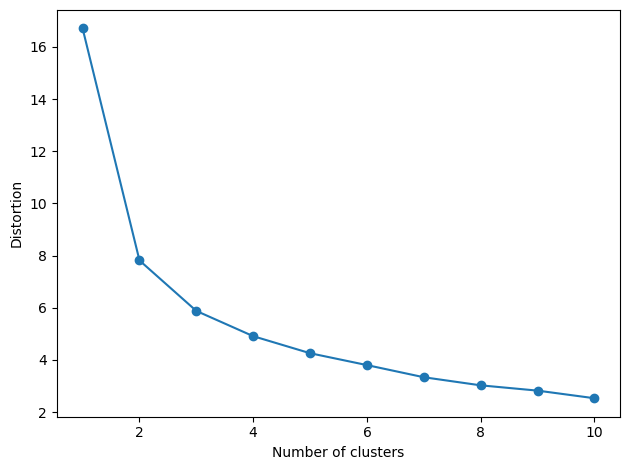

In [23]:
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, 
    init='k-means++', 
    random_state=42)
    km.fit(X_norm)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

Los mejores resultados parecen ser 2 y 3 clusters. Vamos a validar la calidad del agrupamiento con gráfico de la silueta.

In [24]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [30]:
def silhouette_analysis(n_cluster, X):
    km = KMeans(
        n_clusters = n_cluster, 
        init='k-means++', 
        random_state=42)

    y_km = km.fit_predict(X)
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, 
        y_km, 
        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)

        plt.barh(
            range(y_ax_lower, y_ax_upper), 
            c_silhouette_vals, 
            height=1.0, 
            edgecolor='none', 
            color=color
        )

        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(
        silhouette_avg, 
        color="red", 
        linestyle="--"
    )
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

    return y_km

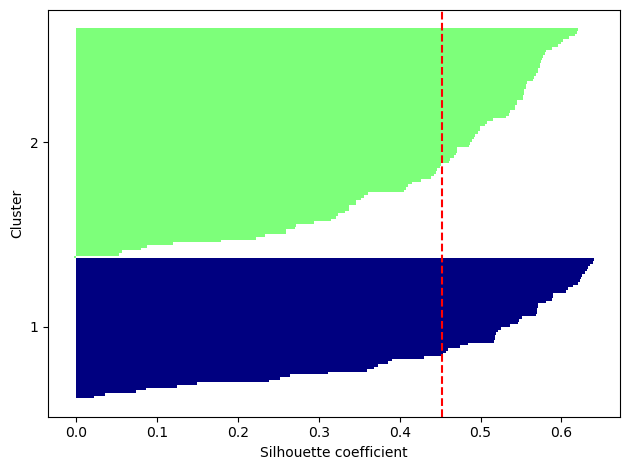

In [33]:
y_pred2 = silhouette_analysis(2, X_norm)

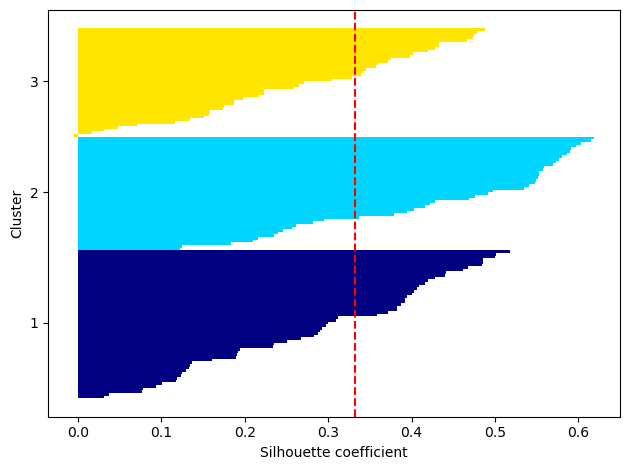

In [34]:
y_pred_3 = silhouette_analysis(3, X_norm)

En el gráfico de la silueta, visualmente lo que buscamos es que lso clusters tengan un "grosor" similar entre ellos, y que su "altura" sobrepase la línea punteada (esta representa el valor promedio del puntaje de la silueta). En base a estos dos gráficos, **el agrupamiento más óptimo es con tres clusters** 

In [35]:
import seaborn as sns
sns.set(style="whitegrid")




In [36]:
df["Clases"] = y_pred_3

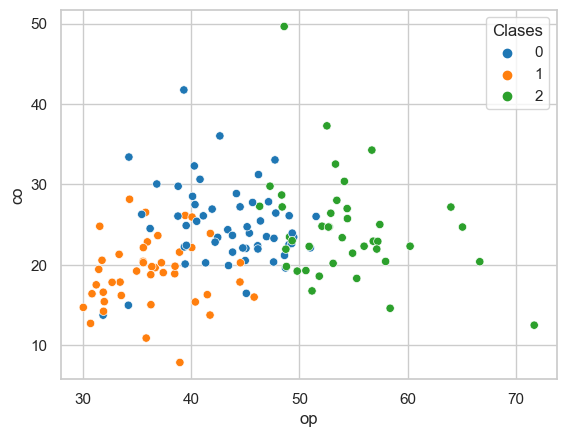

In [40]:
sns.scatterplot(x="op", y="co", hue="Clases", data=df, palette='tab10')
plt.legend(title="Clases", loc="best")
plt.show()

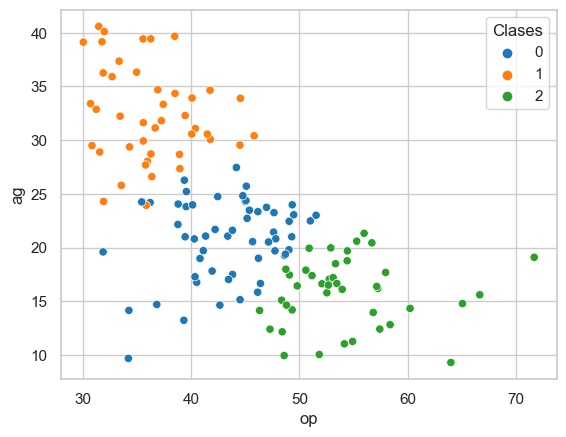

In [41]:
sns.scatterplot(x="op", y="ag", hue="Clases", data=df, palette='tab10')
plt.legend(title="Clases", loc="best")
plt.show()

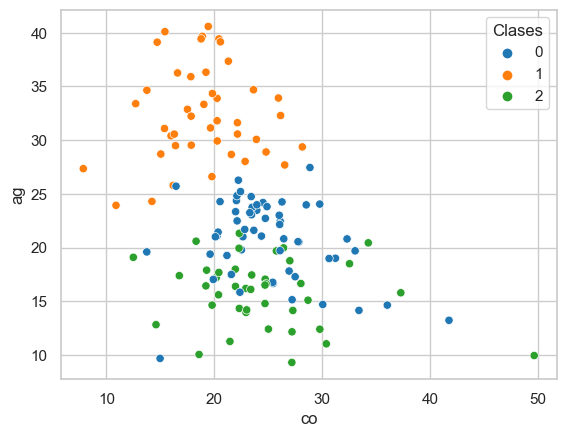

In [42]:
sns.scatterplot(x="co", y="ag", hue="Clases", data=df, palette='tab10')
plt.legend(title="Clases", loc="best")
plt.show()

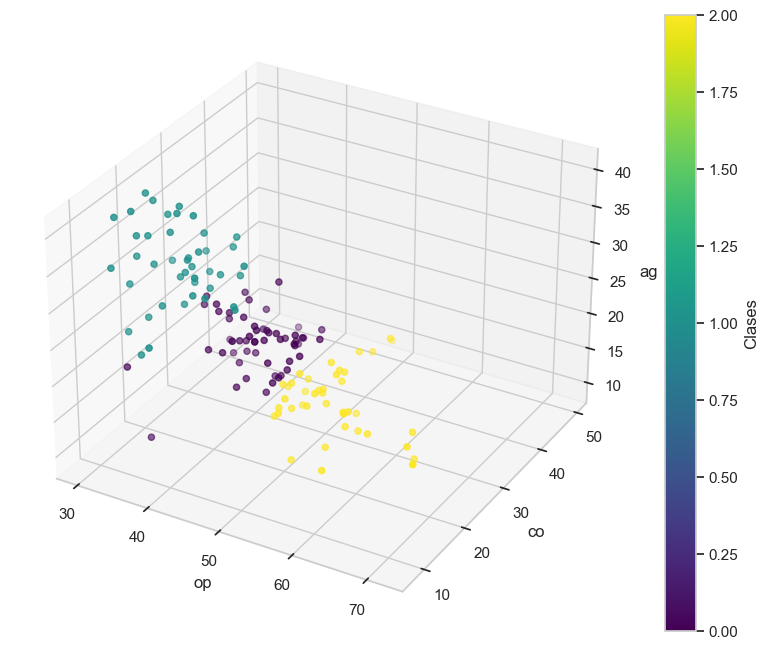

In [54]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Initialize Seaborn for hue-based color mapping
sns.set(style="whitegrid")

# Create a scatter plot with hue
scatter = ax.scatter(df["op"], df["co"], df["ag"], c=df["Clases"], cmap='viridis')

# Add color bar to show hue values
cbar = plt.colorbar(scatter)
cbar.set_label('Clases')

# Set labels for the axes
ax.set_xlabel('op')
ax.set_ylabel('co')
ax.set_zlabel('ag')

# Show the 3D plot
plt.show()

Vamos a comparar los clusters con la varaible de salida.

In [57]:
y_0 = df["categoria"].loc[df["Clases"] == 0]
y_1 = df["categoria"].loc[df["Clases"] == 1]
y_2 = df["categoria"].loc[df["Clases"] == 2]

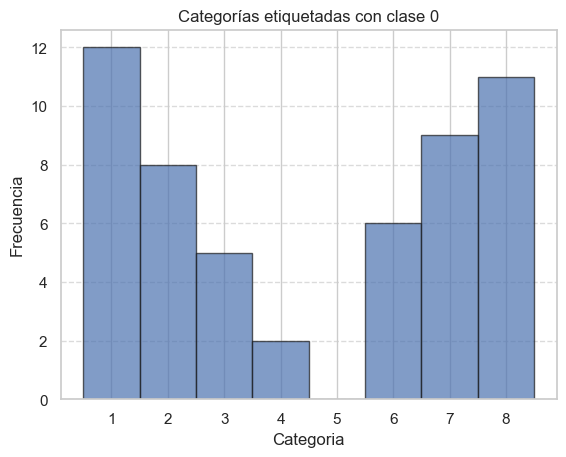

In [65]:
plt.figure()
plt.hist(y_0, bins=np.arange(0,9)+0.5, color = "C0", edgecolor='k', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel("Categoria")
plt.ylabel("Frecuencia")
plt.title("Categorías etiquetadas con clase 0")
plt.show()

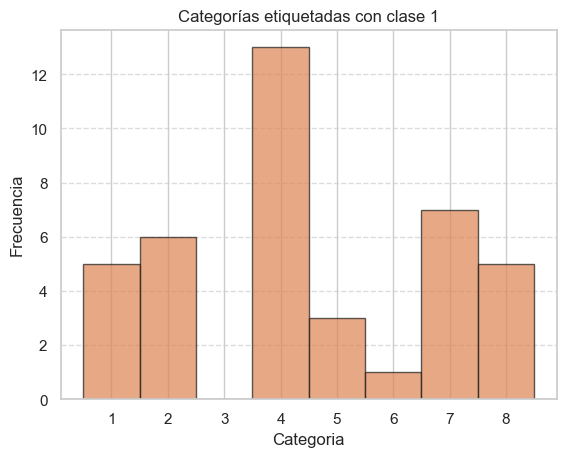

In [66]:
plt.figure()
plt.hist(y_1, bins=np.arange(0,9)+0.5, color = "C1", edgecolor='k', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel("Categoria")
plt.ylabel("Frecuencia")
plt.title("Categorías etiquetadas con clase 1")
plt.show()

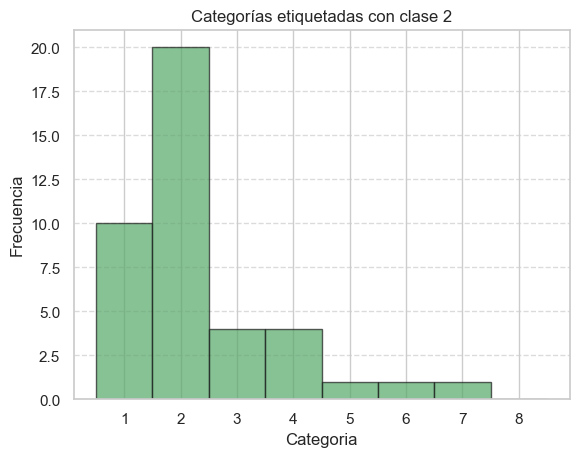

In [74]:
plt.figure()
plt.hist(y_2, bins=np.arange(0,9)+0.5, color = "C2", edgecolor='k', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel("Categoria")
plt.ylabel("Frecuencia")
plt.title("Categorías etiquetadas con clase 2")
plt.show()

# Interpretación

Categorías:

1. Actor/actriz, 
2. Cantante, 
3. Modelo, 
4. Tv, series, 
5. Radio, 
6. Tecnología, 
7. Deportes, 
8. Politica y 
9. Escritor

Variables selccionadas:

- “op”: Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte

- “co”: Conscientiousness – grado de orden, prolijidad, organización

- “ag”: Agreeableness – grado de empatía con los demás, temperamento

De los scatterplots se puede observar lo siguiente: 

Para la clase 0 se agrupan los perfiles con valores medios en los puntajes de las variables seleccionadas. Tienen una tendencia a la baja en el grado de empatía o temperamento

Para la clase 1, se observa bajos grados de apertura mental o curiosidad, valores medio-bajos para el grado de orden u organización, pero valores altos en grados de empatía.

Para la calse 2 se observan valores medio altos en el grado de apertura mental, valores medisos en grados de organización, pero valores bajos en grado de empatía.



In [73]:
df["categoria"].value_counts()

2    34
1    27
4    19
7    17
8    16
3     9
6     8
9     6
5     4
Name: categoria, dtype: int64

Respecto a los resultados de las clases en comparación con las categorías, el resultado no es tan concluyente por el grado de desbalance que presenta la base de datos. Sin embargo, se puede observar para alcunas categorías, como la 2 que tiende a tener valores de la clase 2, la 1 con tendencia a la clase 0 y la 4 asociada a valores de la clase 1.